# TP Simulations de Variables Aléatoires

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import numpy.random as nprd
from scipy.stats import norm,cauchy
from IPython.display import clear_output

## Partie 1 

**A partir de l'inverse généralisée de la fonction de répartition**

L'inverse généralisé de F est donné par : 
$F^-1 = -\dfrac{1}{\lambda} ln(1-u)$

Text(0.5, 1.0, "Echantillons d'une variable aléatoire exponetielle")

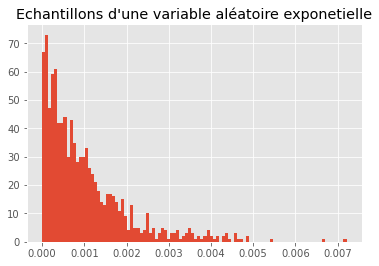

In [17]:

def simulation_echantillons(n=1000,Lambda=2,norm=1):
    tab_echantillons=[]
    for i in range(n):
        u=np.random.uniform()
        tab_echantillons.append(((-1/Lambda)*np.log(1-u))/norm)
    return tab_echantillons

plt.style.use('ggplot')
particules=simulation_echantillons(1000,2)
sum=np.sum(particules)
particules=[p/sum for p in particules]
plt.hist(particules,bins=100)
plt.title("Echantillons d'une variable aléatoire exponetielle")      

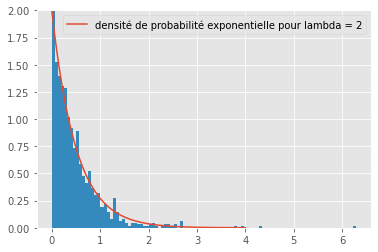

In [30]:
norm = lambda a : a/1000
x=np.linspace(0,4,1000)
f=2*np.exp(-2*x)
plt.figure()
plt.plot(x,f,label='densité de probabilité exponentielle pour lambda = 2')
particules=simulation_echantillons(1000,2)
plt.hist(particules,bins=100,density=True)
plt.ylim(0,2)
plt.legend()

On constate que les échantillons normalisés approchent l'aire sous la courbe de densité. 
Pour N tend vers l'infini on montre que la somme des aires de l'histogramme tend vers l'aire sous la courbe.\
Le problème de cette méthode est qu'elle demande une grande quantité d'achantillons pour estimer l'aire sous la courbe.



## Partie2

In [8]:
N_sample = 10000
M=5
normal_d,cauchy_d = norm(),cauchy()
X_gen=[]

for j in range(N_sample):
    print(round(j/N_sample*100,2),"%")
    clear_output(wait=True)
    u = nprd.uniform()
    x = nprd.standard_cauchy()
    while 1/M*normal_d.pdf(x)/cauchy_d.pdf(x) < u:
        u=nprd.uniform()
        x=nprd.standard_cauchy()
    X_gen.append(x)



    

99.99 %


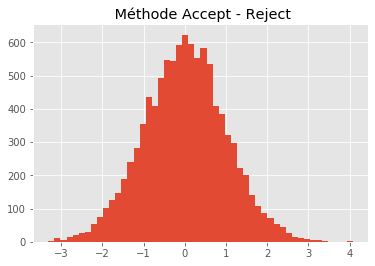

In [16]:
plt.style.use("ggplot")
plt.hist(X_gen,bins= N_sample//200)
plt.title(" Méthode Accept - Reject")
plt.show()

Text(0.5, 1.0, ' Loi normale centrée réduite')

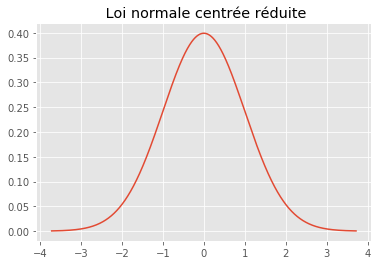

In [21]:
t=np.linspace(normal_d.ppf(0.0001),normal_d.ppf(0.9999),10000)
X=norm.pdf(t)
plt.plot(t,X)
plt.title(" Loi normale centrée réduite")

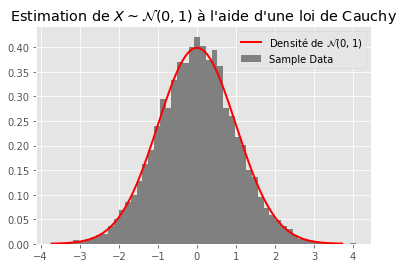

In [35]:
plt.figure()
plt.hist(X_gen,bins= N_sample//200,color="grey",label="Sample Data",density=True)
plt.plot(t,X,color = "red",label="Densité de $\mathcal{N} (0,1)$",linewidth=2)
plt.title("Estimation de $X \sim \mathcal{N} (0,1)$ à l'aide d'une loi de Cauchy ")
plt.legend()
plt.show()

On constate qu'on approche bien une loi Normale centrée réduite. Ainsi, la méthode $\textit{Accept-reject}$ est une bonne méthode pour générer de nombres aléatoires d'une densité connue à l'aide d'un autre générateur de nombres aléatoires, aussi de densité connue. \
On pourra discuter de l'influence de $M$ qui correspond à  l'inverse de la probabilité que x soit accepté est égale.

In [36]:
norm().rvs(size=N_sample)

array([-1.17120934,  0.73587262,  1.29777762, ..., -0.46295837,
       -2.10414342,  0.15621522])